In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
#%matplotlib inline
print("Libs loaded succesfully ")

Libs loaded succesfully 


In [44]:
# Rosenblat to Adaline model
class Perceptron:
    def __init__(self, eta=0.10, epochs=50, is_verbose = False): #(learning_speed, number of epochs, feedback_from_neuron)
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []

    def get_activation(self, x):
        activation = np.dot(x, self.w)
        return activation

    def predict(self, x): # value prediction
        ones = np.ones((x.shape[0],1))
        x_1 = np.append(x.copy(), ones, axis=1)
        #y_pred = np.where(activation >0, 1, -1) ROSENBLAT
        #return y_pred
        return np.where(self.get_activation(x_1) > 0, 1, -1)

    # mathematical matrix operations
    def fit(self, X, y): # neuron learning, y - target value/etiquette/label, X - dataset of traits (columns) and observations (rows)
        self.list_of_errors = []
        ones = np.ones((X.shape[0], 1)) # Z = sum(W * X)
        X_1 = np.append(X.copy(), ones, axis=1)

        self.w = np.random.rand(X_1.shape[1]) # 1st step to randomize weights

        for num in range(self.epochs): # epochs times
            error = 0
            activation = self.get_activation(X_1) # linear stimulation of neuron, tarining set
            delta_w = self.eta * np.dot((y - activation), X_1) #dw = eta * (ytarget - ypred) * x getting vector, correcting weights vector
            self.w += delta_w # dw = w* + w

            error = np.square(y - activation).sum()/2.0
            self.list_of_errors.append(error)
            if(self.is_verbose):
                print("Epoch: {}, weights: {}, error {}".format(
                        num, self.w, error))
print("Adaptive Linear Neuron - Adaline loaded")
# https://sebastianraschka.com/faq/docs/diff-perceptron-adaline-neuralnet.html

Adaptive Linear Neuron - Adaline loaded


In [45]:
# Data source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
diag = pd.read_csv('breast_cancer.csv')
diag

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [46]:
X = diag[['area_mean', 'area_se', 'texture_mean', 'concavity_worst', 'concavity_mean']]
X

,area_mean,area_se,texture_mean,concavity_worst,concavity_mean
0,1001.0,153.40,10.38,0.7119,0.30010
1,1326.0,74.08,17.77,0.2416,0.08690
2,1203.0,94.03,21.25,0.4504,0.19740
3,386.1,27.23,20.38,0.6869,0.24140
4,1297.0,94.44,14.34,0.4000,0.19800
...,...,...,...,...,...
564,1479.0,158.70,22.39,0.4107,0.24390
565,1261.0,99.04,28.25,0.3215,0.14400
566,858.1,48.55,28.08,0.3403,0.09251
567,1265.0,86.22,29.33,0.9387,0.35140


In [47]:
y = diag[['diagnosis']]
y

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [48]:
y= diag['diagnosis']
y = y.apply(lambda d: 1 if d == 'M' else -1)
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568   -1
Name: diagnosis, Length: 569, dtype: int64

In [49]:
# perceptron = Perceptron(eta=0.00001, epochs=100)
# perceptron.fit(X,y)
# plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
# plt.title("epochs(errors)")
#errors

Text(0.5, 1.0, 'epochs(errors)')

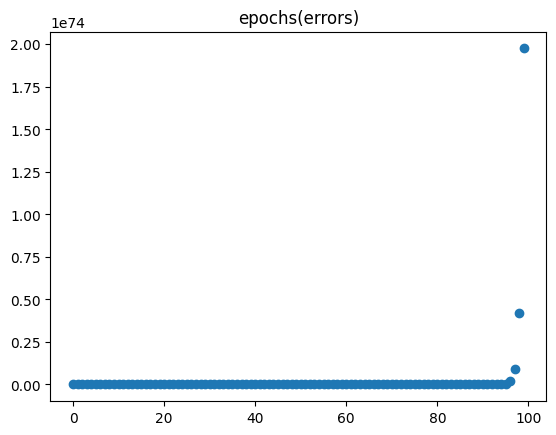

In [50]:
perceptron = Perceptron(eta=0.00000001 , epochs=100)
perceptron.fit(X,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
plt.title("epochs(errors)")
# divergent graph

In [63]:
X

,area_mean,area_se,texture_mean,concavity_worst,concavity_mean
0,1001.0,153.40,10.38,0.7119,0.30010
1,1326.0,74.08,17.77,0.2416,0.08690
2,1203.0,94.03,21.25,0.4504,0.19740
3,386.1,27.23,20.38,0.6869,0.24140
4,1297.0,94.44,14.34,0.4000,0.19800
...,...,...,...,...,...
564,1479.0,158.70,22.39,0.4107,0.24390
565,1261.0,99.04,28.25,0.3215,0.14400
566,858.1,48.55,28.08,0.3403,0.09251
567,1265.0,86.22,29.33,0.9387,0.35140


In [64]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568   -1
Name: diagnosis, Length: 569, dtype: int64

Text(0.5, 1.0, 'epochs(errors)')

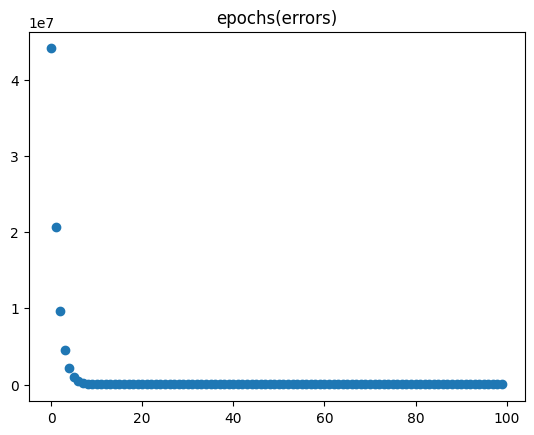

In [51]:
perceptron = Perceptron(eta=0.000000001 , epochs=100)
perceptron.fit(X,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
plt.title("epochs(errors)")
# convergent graph

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # data standarization - conversion of data into a standard format that computers can read and understand
# mean = 0
# standard deviation = 1
# Standarization causes that we can rise up a little bit value eta
scaler.fit(X)
X_std = scaler.transform(X) # copy of data
X_std

array([[ 0.9843749 ,  2.48757756, -2.07333501,  2.10952635,  2.65287398],
       [ 1.90870825,  0.74240195, -0.35363241, -0.14674897, -0.02384586],
       [ 1.55888363,  1.18133606,  0.45618695,  0.85497394,  1.36347845],
       ...,
       [ 0.57795264,  0.1806983 ,  2.0455738 ,  0.3267666 ,  0.04658753],
       [ 1.73521799,  1.0095027 ,  2.33645719,  3.19760468,  3.296944  ],
       [-1.34778924, -0.46615196,  1.22179204, -1.30583065, -1.11487284]])

C:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'epochs(errors)')

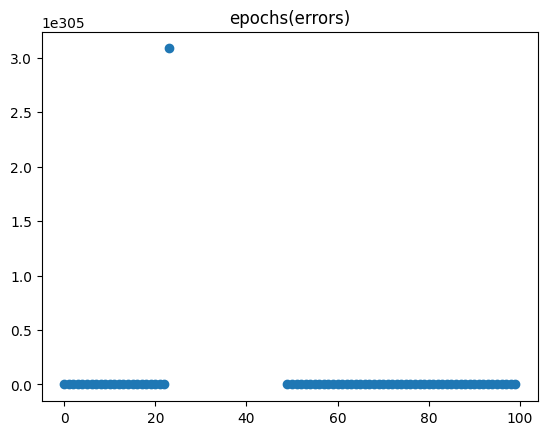

In [53]:
perceptron = Perceptron(eta=0.01 , epochs=100)
perceptron.fit(X,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
plt.title("epochs(errors)")

C:\Users\szymo\AppData\Local\Temp\ipykernel_172\1055433301.py:32: RuntimeWarning: invalid value encountered in add
  self.w += delta_w # dw = w* + w


Text(0.5, 1.0, 'epochs(errors)')

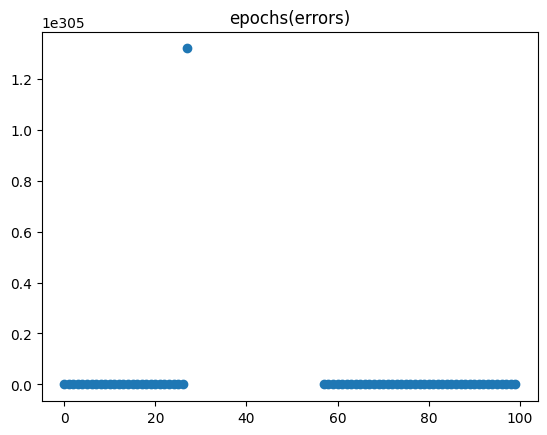

In [54]:
perceptron = Perceptron(eta=0.001 , epochs=100)
perceptron.fit(X,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
plt.title("epochs(errors)")

Text(0.5, 1.0, 'epochs(errors)')

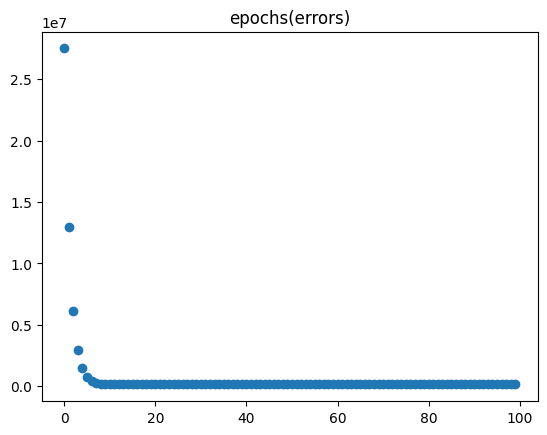

In [55]:
perceptron = Perceptron(eta=0.000000001 , epochs=100)
perceptron.fit(X,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
plt.title("epochs(errors)")

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)

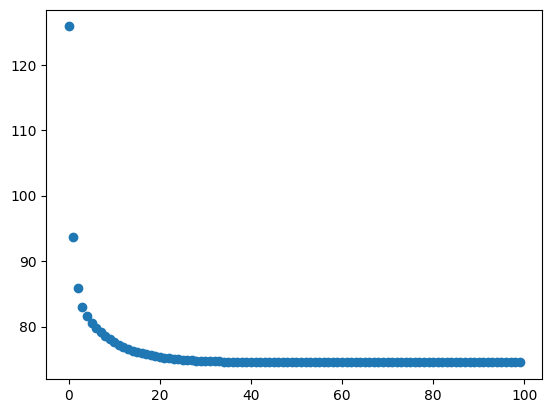

In [57]:
perceptron = Perceptron(eta=0.001, epochs=100)
perceptron.fit(X_train, y_train)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)

In [65]:
y_pred = perceptron.predict(X_test)
y_pred

array([-1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
        1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1])

In [59]:
good = y_test[y_test == y_pred].count()
total = y_test.count()
print('result: {}'.format(100*good/total))
# 92% of accurancy

result: 92.98245614035088


In [61]:
X_train

array([[ 2.53441083,  4.04309843, -0.4746399 ,  0.06674083,  0.35154778],
       [ 1.09529491,  0.29862746,  0.16064943,  0.50955225,  0.3000724 ],
       [-0.59637733, -0.47957301, -1.36125247, -0.52767234, -0.64016939],
       ...,
       [-0.17260604,  0.09687179, -1.42408329, -0.55789673,  0.15317924],
       [ 0.08421643,  0.11139292,  0.19555543,  0.0921677 , -0.18643273],
       [-0.55343138, -0.52423648, -0.31407227, -0.37367183, -0.62711222]])